In [85]:
# 세계행복지수 엑셀파일 불러오기
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Jupyter Notebook에서 WHR_2025.xls 파일 불러오기
happiness_data = pd.read_excel("/Users/iyunseo/Desktop/세계행복지수_2025.xlsx")    

In [86]:
happiness_data = pd.read_excel("/Users/iyunseo/Desktop/세계행복지수_2025.xlsx", engine='openpyxl',header=0)    ###수정사항-> 중복이므로 삭제 4번이랑 중복

In [87]:
from openpyxl import load_workbook

wb = load_workbook("/Users/iyunseo/Desktop/세계행복지수_2025.xlsx")
print(wb.sheetnames)

['Sheet1']


In [88]:
import pandas as pd #판다스

# 1) 엑셀 읽기
happiness_data = pd.read_excel(
    "/Users/iyunseo/Desktop/세계행복지수_2025.xlsx",
    engine="openpyxl",
    sheet_name="Sheet1",
    header=0  
)

# 2) 첫 번째 컬럼 이름을 "Country name"으로 변경
happiness_data = happiness_data.rename(columns={happiness_data.columns[0]: "Country name"})

# 3) 출력
happiness_data.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
2,Iceland,7.515,7.606,7.425,1.799,1.840,0.873,0.971,0.201,0.173,1.659
3,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
4,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583


In [89]:
# 컬럼명 통일
name_map = {
    "Explained by: Log GDP per capita": "GDP per capita",
    "Explained by: Social support": "Social support",
    "Explained by: Healthy life expectancy": "Life expectancy",
    "Explained by: Freedom to make life choices": "Freedom",
    "Explained by: Generosity": "Generosity",
    "Explained by: Perceptions of corruption": "Corruption"
}
#DataFrame의 열 이름 변경
happiness_data.rename(columns=name_map, inplace=True)

In [90]:
# 'Explained by: ' 텍스트 제거
happiness_data.columns = happiness_data.columns.str.replace("Explained by: ", "", regex=False)   ###수정사항!! -> 이 행 삭제 (5번에서 이미 시행됨)

In [91]:
happiness_data.columns

Index(['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker',
       'GDP per capita', 'Social support', 'Life expectancy', 'Freedom',
       'Generosity', 'Corruption', 'Dystopia + residual'],
      dtype='object')

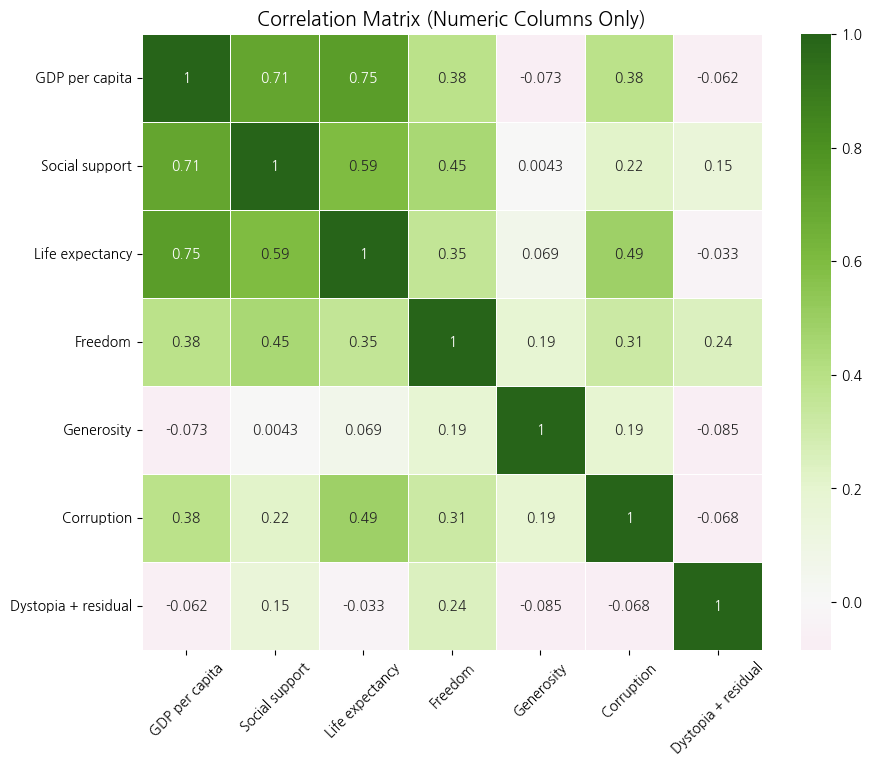

In [92]:
# 행복지수에 영향을 주는 요소 - 상관계수 히트맵

import matplotlib.pyplot as plt
import seaborn as sns

# 숫자형 데이터만 선택
numeric_df = happiness_data.select_dtypes(include=['number'])

# 상관계수 계산
corrmat = numeric_df.corr()

# 제외할 변수
exclude_vars = ["lowerwhisker", "upperwhisker", "Ladder score"]
corrmat = corrmat.drop(index=exclude_vars, errors='ignore')
corrmat = corrmat.drop(columns=exclude_vars, errors='ignore')

# 컬럼명 정리

# 히트맵 
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, cmap="PiYG", center=0, linewidths=0.5)
plt.title("Correlation Matrix (Numeric Columns Only)", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [93]:
# 행복지수에 영향을 미치는 요소 TOP3 추출

# Happiness score와 상관계수 추출
corr_hap = numeric_df.corr()["Ladder score"]

# index에서 "Explained by: " 제거
corr_hap.index = corr_hap.index.str.replace("Explained by: ", "", regex=False)

# 제외할 변수 제거
exclude_vars = ["lowerwhisker", "upperwhisker", "Ladder score"]
corr_hap = corr_hap.drop(labels=[v for v in exclude_vars if v in corr_hap.index], errors='ignore')

# 소수점 반올림 + 이름 기준 중복 제거
corr_unique = corr_hap.round(3)[~corr_hap.index.duplicated(keep='first')]

# 상위 3개 추출
top3_real = corr_unique.sort_values(ascending=False).head(3)

print("행복지수에 영향 미치는 변수 TOP 3:")
print(top3_real)

행복지수에 영향 미치는 변수 TOP 3:
Social support     0.812
GDP per capita     0.763
Life expectancy    0.712
Name: Ladder score, dtype: float64


In [94]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# NanumGothic 폰트 등록
font_path = "/Users/iyunseo/Desktop/NanumGothic-Regular.ttf"
fm.fontManager.addfont(font_path)
nanum_font = fm.FontProperties(fname=font_path).get_name()

# 폰트 패밀리 설정: 한글 NanumGothic, 라틴 DejaVu Sans
plt.rcParams['font.family'] = [nanum_font, 'DejaVu Sans']

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("✔ 폰트 설정 완료:", plt.rcParams['font.family'])

✔ 폰트 설정 완료: ['NanumGothic', 'DejaVu Sans']


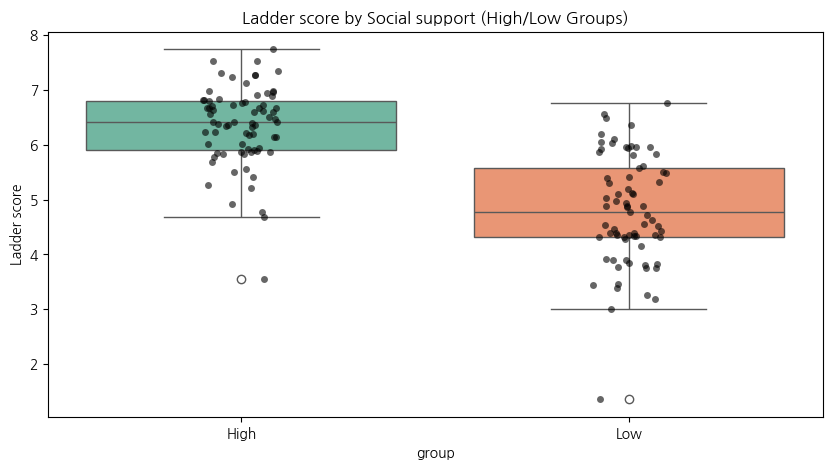

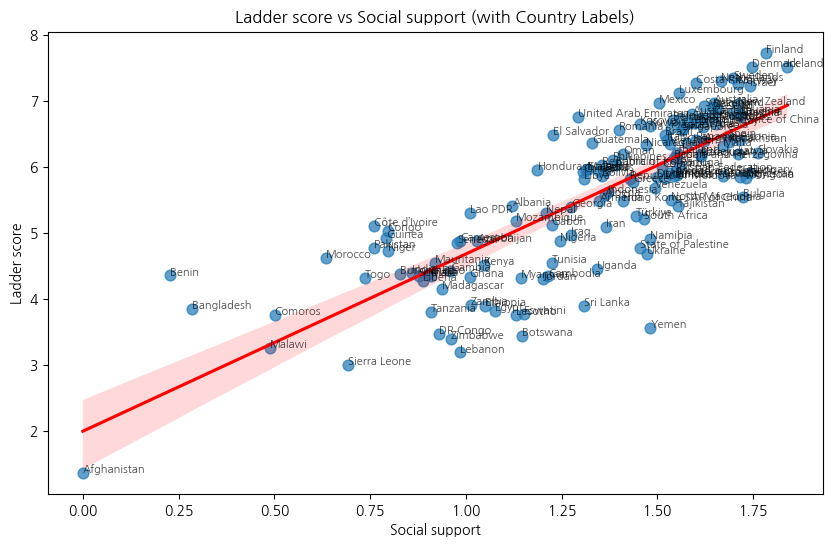

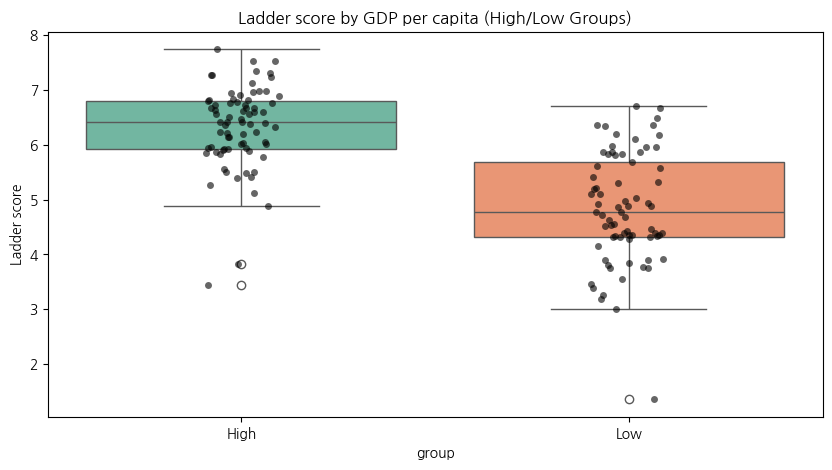

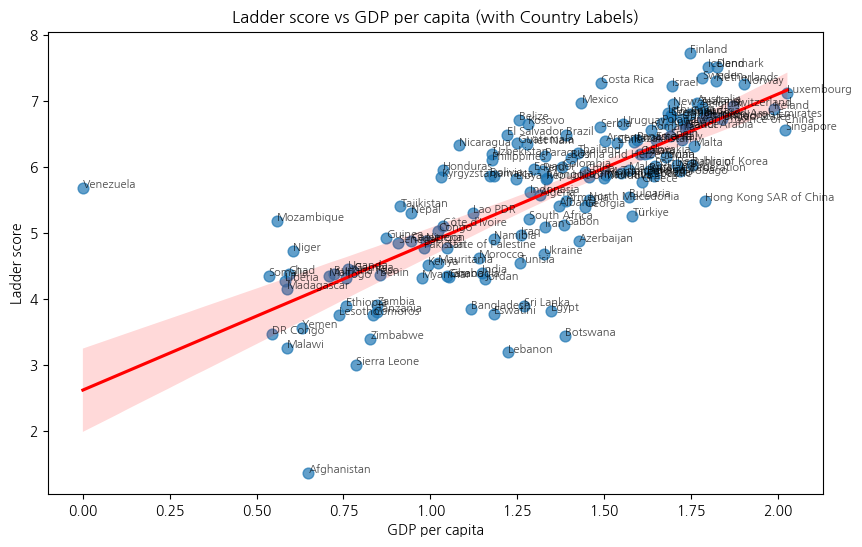

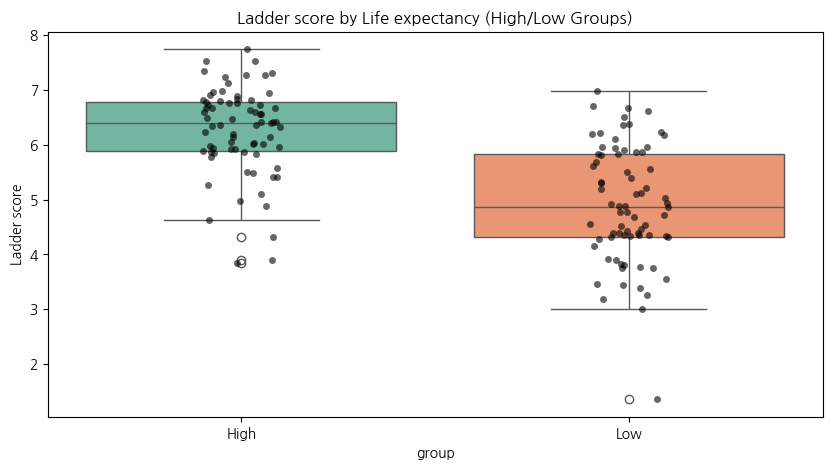

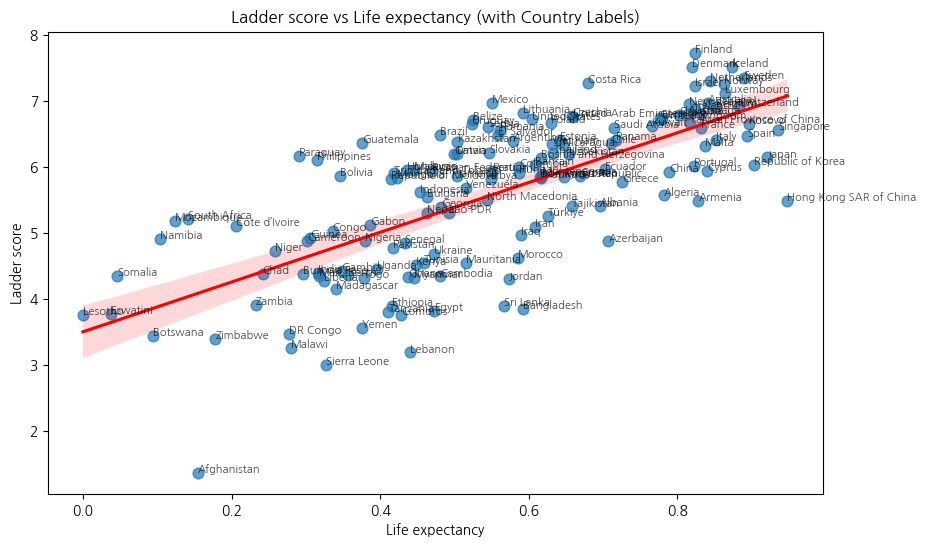

In [95]:
# 행복지수에 영향을 미치는 변수 - Boxplot, Scatter

# TOP3 변수
top3_vars = [ "Social support", "GDP per capita", "Life expectancy"]

# 시각화 함수
def plot_top3_box_scatter(df, var, score="Ladder score", country_col="Country name"):
    """
    1) 변수 기준 High/Low 그룹 생성
    2) Boxplot + 국가 이름 표시
    3) 산점도 (scatter) + 회귀선 표시
    """

    # High/Low 그룹 생성
    median_val = df[var].median()
    df['group'] = df[var].apply(lambda x: "High" if x >= median_val else "Low")

    
    # Boxplot + stripplot
    plt.figure(figsize=(10,5))
    sns.boxplot(
        x='group',
        y=score,
        data=df,
        hue='group',
        palette="Set2",
        legend=False
    )
    sns.stripplot(x='group', y=score, data=df, color='black', alpha=0.6)
    plt.title(f"{score} by {var} (High/Low Groups)")
    plt.show()

    
    # Scatter + 회귀선 + 국가 이름
    plt.figure(figsize=(10,6))
    sns.regplot(
        data=df,
        x=var,
        y=score,
        scatter_kws={'s':60, 'alpha':0.7},
        line_kws={'color':'red'}
    )

    # 국가 이름 표시
    for i in range(df.shape[0]):
        plt.text(
            df[var].iloc[i],
            df[score].iloc[i],
            df[country_col].iloc[i],
            fontsize=8,
            alpha=0.7
        )

    plt.title(f"{score} vs {var} (with Country Labels)")
    plt.xlabel(var)
    plt.ylabel(score)
    plt.show()

    # group 컬럼 삭제
    df.drop(columns=['group'], inplace=True)


# 반복 실행
for var in top3_vars:
    plot_top3_box_scatter(happiness_data, var)

In [96]:
# TOP3 변수의 영향력 검증 - OLS분석

import pandas as pd
import statsmodels.api as sm


# 원래 변수명(top3_real)과 실제 컬럼 매칭
original_vars = top3_real.index.tolist()

# 실제 컬럼 이름 확인
print("데이터프레임 컬럼:", happiness_data.columns.tolist())

# 실제 컬럼과 매칭
top3_vars = []
for var in original_vars:
    matched_cols = [c for c in happiness_data.columns if var in c]
    if matched_cols:
        top3_vars.append(matched_cols[0])

print("사용할 컬럼:", top3_vars)


# 설명 변수(X)와 목표 변수(y) 정의
X = happiness_data[top3_vars]
y = happiness_data["Ladder score"]


# 결측치 있는 행 제거 후 회귀
data_clean = pd.concat([X, y], axis=1).dropna()
X_clean = data_clean[top3_vars]
y_clean = data_clean["Ladder score"]

# 상수항 추가
X_clean = sm.add_constant(X_clean)

# OLS 회귀
model_clean = sm.OLS(y_clean, X_clean).fit()
print("=== 결측치 제거 후 회귀 결과 ===")
print(model_clean.summary())


# 결측치를 평균으로 대체 후 회귀
X_filled = X.fillna(X.mean())
y_filled = y.fillna(y.mean())

# 상수항 추가
X_filled = sm.add_constant(X_filled)

# OLS 회귀
model_filled = sm.OLS(y_filled, X_filled).fit()
print("\n=== 결측치 평균 대체 후 회귀 결과 ===")
print(model_filled.summary())

데이터프레임 컬럼: ['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker', 'GDP per capita', 'Social support', 'Life expectancy', 'Freedom', 'Generosity', 'Corruption', 'Dystopia + residual']
사용할 컬럼: ['Social support', 'GDP per capita', 'Life expectancy']
=== 결측치 제거 후 회귀 결과 ===
                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     148.7
Date:                Sat, 06 Dec 2025   Prob (F-statistic):           1.28e-43
Time:                        19:58:22   Log-Likelihood:                -124.65
No. Observations:                 146   AIC:                             257.3
Df Residuals:                     142   BIC:                             269.2
Df Model:                           3                                         
Covarianc

In [97]:
# TOP3 변수 기반 국가 클러스터링 + Plotly 버블차트


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import numpy as np


# 1) TOP3 변수 선택
vars_top3 = ["GDP per capita",   
             "Social support", 
             "Life expectancy"]

# 실제 국가명 컬럼 확인
country_col = "Country name"  
score_col = "Ladder score"

df = happiness_data[[country_col, score_col] + vars_top3].dropna()


# 2) StandardScaler + KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[vars_top3])

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled).astype(str)  # 범주형으로 변환


# 3) 라벨 표시할 국가 선정 
label_countries = []

# ex) GDP 상위 5
label_countries += df.sort_values(vars_top3[0], ascending=False)[country_col].head(5).tolist()
# ex) Social support 상위 5
label_countries += df.sort_values(vars_top3[1], ascending=False)[country_col].head(5).tolist()
# 중복 제거
label_countries = list(set(label_countries))

df["label"] = np.where(df[country_col].isin(label_countries), df[country_col], "")


# 4) Plotly 버블차트
fig = px.scatter(
    df,
    x=vars_top3[0],
    y=vars_top3[1],
    size=score_col,
    color="cluster",
    hover_name=country_col,
    text="label",
    size_max=20,
    opacity=0.7,
    color_discrete_sequence=px.colors.qualitative.Set3  # 범주형 색상
)

fig.update_traces(textposition="top center", textfont_size=10)
fig.update_layout(
    title="TOP3 변수 기반 국가 분류 (버블 차트)",
    xaxis_title=vars_top3[0],
    yaxis_title=vars_top3[1],
    plot_bgcolor="white",
)

fig.show()


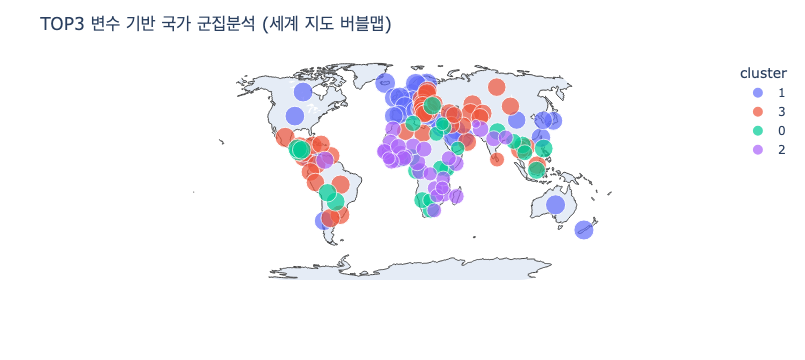

In [98]:
# TOP3 변수 기반 국가 군집분석 (세계 지도 버블맵)

import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np


# 1) TOP3 변수 설정 (실제 컬럼명 기반)
vars_top3 = [               
    "GDP per capita",
    "Social support",
    "Life expectancy"
]

# 실제 국가명 컬럼 확인
country_col = "Country name"  
score_col = "Ladder score"

df = happiness_data[[country_col, score_col] + vars_top3].dropna()


# 2) StandardScaler + KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[vars_top3])

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled).astype(str)  # 범주형으로 변환


# 3) Plotly 세계지도 버블 차트(scatter_geo)
fig = px.scatter_geo(
    df,
    locations=country_col,               
    locationmode="country names",
    size=score_col,                      
    color="cluster",                     
    hover_name=country_col,              
    hover_data={
        vars_top3[0]: True,
        vars_top3[1]: True,
        score_col: True,
        "cluster": True
    },
    projection="natural earth",
    size_max=15
)

fig.update_layout(
    title="TOP3 변수 기반 국가 군집분석 (세계 지도 버블맵)",
    geo=dict(showframe=False, showcoastlines=True, bgcolor="rgba(0,0,0,0)")
)

fig.show()

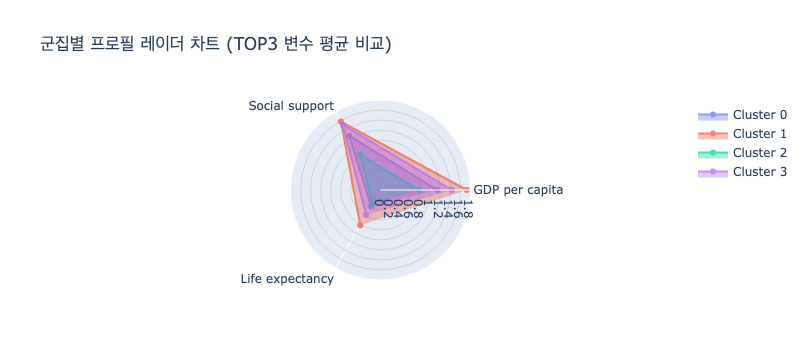


🔹 Cluster 0 국가 목록 (26개)
El Salvador, Guatemala, Paraguay, Philippines, Honduras, Bolivia, Republic of Moldova, Indonesia, Nepal, Lao PDR, South Africa, Gabon, Namibia, Nigeria, Tunisia, Kenya, Uganda, Cambodia, Ghana, Myanmar, Jordan, Egypt, Eswatini, Yemen, Botswana, Lebanon

🔹 Cluster 1 국가 목록 (41개)
Finland, Denmark, Iceland, Sweden, Netherlands, Norway, Israel, Luxembourg, Australia, New Zealand, Switzerland, Belgium, Ireland, Austria, Canada, Slovenia, Czechia, United Arab Emirates, Germany, United Kingdom, United States, Taiwan Province of China, Kosovo, Kuwait, Saudi Arabia, France, Singapore, Spain, Italy, Panama, Chile, Malta, Japan, Republic of Korea, Portugal, Cyprus, China, Croatia, Greece, Armenia, Hong Kong SAR of China

🔹 Cluster 2 국가 목록 (32개)
Venezuela, Mozambique, Côte d’Ivoire, Congo, Guinea, Cameroon, Senegal, Pakistan, Niger, Morocco, Mauritania, Gambia, India, Chad, Burkina Faso, Benin, Somalia, Mali, Togo, Liberia, Madagascar, Zambia, Ethiopia, Bangladesh, Tanzania

In [99]:
# 국가별 군집 분석 (레이더 차트 + 국가 목록)


import plotly.graph_objects as go


# 1) 군집별 평균값 계산
country_col = "Country name"  
vars_top3 = [
    "GDP per capita",
    "Social support",
    "Life expectancy"
]

cluster_mean = df.groupby("cluster")[vars_top3].mean()


# 2) 레이더 차트 생성
fig = go.Figure()

for c in cluster_mean.index:
    fig.add_trace(go.Scatterpolar(
        r = cluster_mean.loc[c].values,
        theta = vars_top3,
        fill='toself',
        name=f'Cluster {c}',
        opacity=0.7
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            showline=True,
            linewidth=1,
            gridcolor="lightgray"
        )
    ),
    title="군집별 프로필 레이더 차트 (TOP3 변수 평균 비교)",
    showlegend=True
)

fig.show()


# 3) 클러스터별 국가 목록 출력
for c in sorted(df["cluster"].unique()):
    countries = df[df["cluster"] == c][country_col].tolist()
    print(f"\n🔹 Cluster {c} 국가 목록 ({len(countries)}개)")
    print(", ".join(countries))

In [100]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# NanumGothic 폰트 등록
font_path = "/Users/iyunseo/Desktop/NanumGothic-Regular.ttf"
fm.fontManager.addfont(font_path)
nanum_font = fm.FontProperties(fname=font_path).get_name()

# 폰트 패밀리 설정: 한글 NanumGothic, 라틴 DejaVu Sans
plt.rcParams['font.family'] = [nanum_font, 'DejaVu Sans']

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("✔ 폰트 설정 완료:", plt.rcParams['font.family'])

✔ 폰트 설정 완료: ['NanumGothic', 'DejaVu Sans']


📌 사용되는 TOP3 변수: ['GDP per capita', 'Social support', 'Life expectancy']

📌 df 컬럼명:
['Country name', 'Ladder score', 'GDP per capita', 'Social support', 'Life expectancy', 'cluster']

📌 cluster_mean 컬럼명:
['GDP per capita', 'Social support', 'Life expectancy']


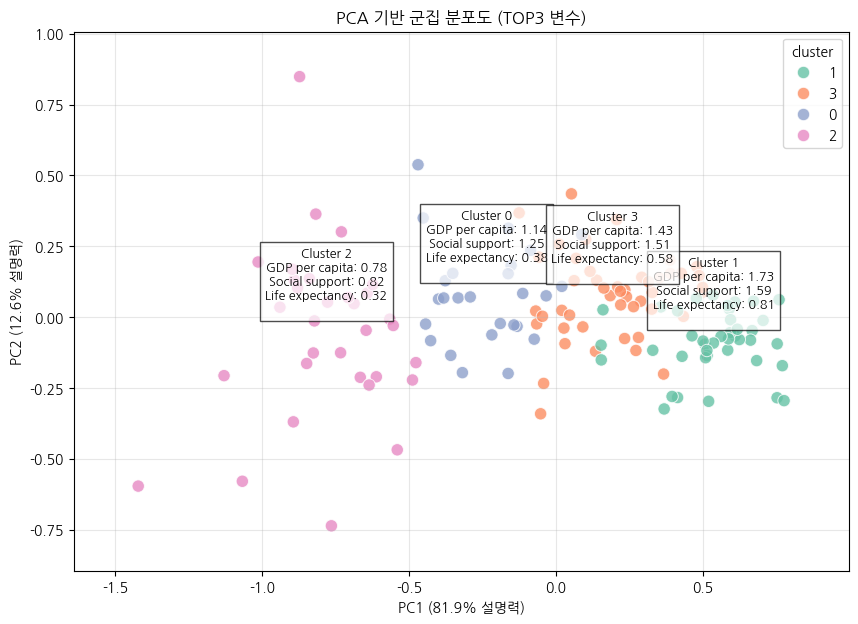


  군집별 국가 목록 출력

🔹 Cluster 0 (26개 국가)
El Salvador, Guatemala, Paraguay, Philippines, Honduras, Bolivia, Republic of Moldova, Indonesia, Nepal, Lao PDR, South Africa, Gabon, Namibia, Nigeria, Tunisia, Kenya, Uganda, Cambodia, Ghana, Myanmar, Jordan, Egypt, Eswatini, Yemen, Botswana, Lebanon

--------------------------

🔹 Cluster 1 (41개 국가)
Finland, Denmark, Iceland, Sweden, Netherlands, Norway, Israel, Luxembourg, Australia, New Zealand, Switzerland, Belgium, Ireland, Austria, Canada, Slovenia, Czechia, United Arab Emirates, Germany, United Kingdom, United States, Taiwan Province of China, Kosovo, Kuwait, Saudi Arabia, France, Singapore, Spain, Italy, Panama, Chile, Malta, Japan, Republic of Korea, Portugal, Cyprus, China, Croatia, Greece, Armenia, Hong Kong SAR of China

--------------------------

🔹 Cluster 2 (32개 국가)
Venezuela, Mozambique, Côte d’Ivoire, Congo, Guinea, Cameroon, Senegal, Pakistan, Niger, Morocco, Mauritania, Gambia, India, Chad, Burkina Faso, Benin, Somalia, Mali, To

In [101]:
# 국가별 군집 결과 검증 - PCA 분석

# 1) PCA 
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# TOP3 변수 
print("📌 사용되는 TOP3 변수:", vars_top3)

# 컬럼 확인
print("\n📌 df 컬럼명:")
print(df.columns.tolist())

# X 데이터
X = df[vars_top3].values

# PCA 변환
pca = PCA(n_components=2)
pc = pca.fit_transform(X)

df["PC1"] = pc[:, 0]
df["PC2"] = pc[:, 1]


# 2) PCA 시각화
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x="PC1",
    y="PC2",
    hue="cluster",
    palette="Set2",
    s=80,
    alpha=0.8
)

plt.title("PCA 기반 군집 분포도 (TOP3 변수)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% 설명력)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% 설명력)")
plt.grid(alpha=0.3)

# 축 범위 + 패딩
x_min, x_max = df["PC1"].min(), df["PC1"].max()
y_min, y_max = df["PC2"].min(), df["PC2"].max()
x_pad = (x_max - x_min) * 0.1
y_pad = (y_max - y_min) * 0.1

plt.xlim(x_min - x_pad, x_max + x_pad)
plt.ylim(y_min - y_pad, y_max + y_pad)


# 3) 군집 텍스트 박스 추가
cluster_mean = df.groupby("cluster")[vars_top3].mean()

print("\n📌 cluster_mean 컬럼명:")
print(cluster_mean.columns.tolist())

for c in sorted(df["cluster"].unique()):
    center = df[df["cluster"] == c][["PC1", "PC2"]].mean()

    # 변수 이름 자동 출력 (KeyError 방지)
    desc = f"Cluster {c}\n"
    for col in vars_top3:
        desc += f"{col}: {cluster_mean.loc[c, col]:.2f}\n"

    plt.text(
        center["PC1"],
        center["PC2"] + y_pad*0.4,
        desc,
        fontsize=9,
        ha="center",
        va="bottom",
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="black")
    )

plt.show()


# 4) 군집별 국가 목록 출력
print("\n==========================")
print("  군집별 국가 목록 출력")
print("==========================\n")

for c in sorted(df["cluster"].unique()):
    cluster_df = df[df["cluster"] == c]
    countries = cluster_df["Country name"].tolist()
    print(f"🔹 Cluster {c} ({len(countries)}개 국가)")
    print(", ".join(countries))
    print("\n--------------------------\n")